In [110]:
import warnings
warnings.filterwarnings('ignore')
dirName = 'jaffedbase'

In [111]:
import imageio
import os
import matplotlib.pyplot as plt
import numpy as np

def loadImages(dirName, class_mode='emotion'):
    '''
    # This function loads images from any directory
    # :param str dirName: is address of the directory (string)
    # :param str class_mode: is the classification mode (emotion or recognition) (string)
    '''
    assert class_mode in ['emotion', 'recognition'], "Class mode should be either 'emotion' or 'recognition'."
    data = []
    label = []
    for root, dirs, files in os.walk(dirName):
        for file in files:
            #face = scipy.misc.imread(os.path.join(root, file)) # Load image from a path
            face = imageio.imread(os.path.join(root, file))
            face = face.reshape(256 * 256, ).tolist()          # Flatten image. Note: size of any image is 256,256
            data.append(face)
            if class_mode == 'recognition':
                label.append(file.split('.')[0])
            if class_mode == 'emotion':
                label.append(file.split('.')[1][:2])
    return np.asarray(data) , label


number of images is 213 and number of features for each image is 65536


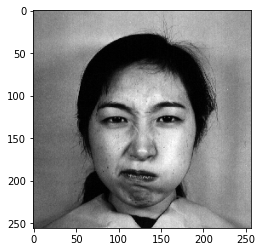

In [5]:

dataset, label = loadImages(dirName, class_mode='emotion')
print("number of images is" , dataset.shape[0] , "and number of features for each image is", dataset.shape[1])

### To show each images, you should reshape it to 256,256 and then use 'plt.imshow'
plt.imshow(dataset[0].reshape(256,256) , cmap='gray')
plt.show()

In [6]:
def z_norm(dataset):
  mean = np.mean(dataset,axis=0)
  std = np.std(dataset, axis=0)
  return (dataset-mean)/std

In [7]:
dataset_norm = z_norm(dataset)

In [8]:
dataset_norm.shape

(213, 65536)

In [37]:
from sklearn.decomposition import PCA

pca99 = PCA()
pca99.fit(dataset_norm)

PCA()

In [38]:
pca99.n_components_

213

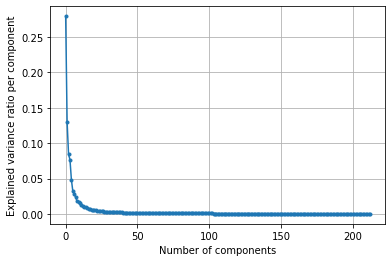

In [39]:
import matplotlib.pyplot as plt
plt.plot(pca99.explained_variance_ratio_, marker='.')
plt.grid(True)
plt.xlabel('Number of components')
plt.ylabel('Explained variance ratio per component')
plt.savefig('full_PCA.pdf')
plt.show()

In [40]:
pca15 = PCA(n_components=0.9)
pca15.fit(dataset_norm)

PCA(n_components=0.9)

In [41]:
pca15.n_components_

44

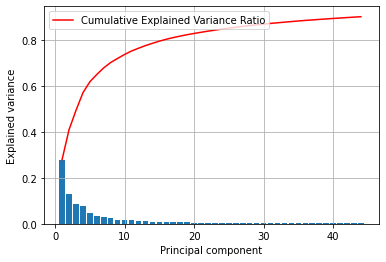

In [42]:
plt.bar(range(1,len(pca15.explained_variance_ratio_ )+1),pca15.explained_variance_ratio_ )
plt.ylabel('Explained variance')
plt.xlabel('Principal component')
plt.plot(range(1,len(pca15.explained_variance_ratio_ )+1),
         np.cumsum(pca15.explained_variance_ratio_),
         c='red',
         label="Cumulative Explained Variance Ratio")
plt.legend(loc='upper left')
plt.grid()
plt.savefig('explained_variance_ratio_pca5.pdf')

In [43]:
low_dim = pca15.transform(dataset)
reconstructed = pca15.inverse_transform(low_dim)

In [44]:
low_dim_all = pca99.transform(dataset)
reconstructed_all = pca99.inverse_transform(low_dim_all)

In [45]:
print(low_dim_all.shape, reconstructed_all.shape, pca99.components_.shape)
print(pca15.components_.shape)

(213, 213) (213, 65536) (213, 65536)
(44, 65536)


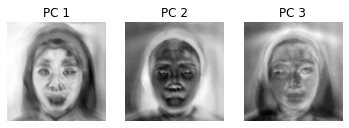

In [46]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3)

ax1.axis('off')
ax1.imshow(pca15.components_[0].reshape(256,256),cmap='gray') 
ax1.title.set_text('PC 1')

ax2.axis('off')
ax2.imshow(pca15.components_[1].reshape(256,256),cmap='gray')
ax2.title.set_text('PC 2')

ax3.axis('off')
ax3.imshow(pca15.components_[2].reshape(256,256),cmap='gray')
ax3.title.set_text('PC 3')

plt.savefig('eigenFaces.pdf', bbox_inches='tight')

In [47]:
def plot_principal_component(index_image, index_pc):
  fig, (ax1, ax2, ax3) = plt.subplots(1, 3)

  original = dataset[index_image].reshape((256,256))
  eigenvector = pca15.components_[index_pc].reshape((256,256))
  difference = np.sqrt(np.power(np.subtract(original, eigenvector),2))

  vmax = max(np.max(original), np.max(eigenvector))
  vmin = np.min(difference)

  ax1.axis('off')
  ax1.title.set_text('Original')
  ax1.imshow(original, cmap='gray', vmin=0, vmax=vmax)

  ax2.axis('off')
  ax2.title.set_text('First eigenvector')
  ax2.imshow(eigenvector, cmap='gray')

  ax3.axis('off')
  ax3.title.set_text('Difference')
  ax3.imshow(difference,cmap='hot', vmin = vmin, vmax = vmax)

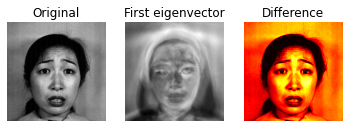

In [48]:
plot_principal_component(6,2)

In [49]:
from sklearn.decomposition import PCA

pca2 = PCA(n_components=2)
pca2.fit(dataset)
low_dim2 = pca2.transform(dataset)

In [50]:
def label_to_int(label):
    label_dis = set(label)
    conv_dict = {}
    counter = 0
    int_labels = []
    for l in list(label_dis):
        conv_dict[l] = counter
        counter += 1
    for l in label:
        int_labels.append(conv_dict[l])
    int_to_label_dict = {value:key for (key,value) in conv_dict.items()}

    return int_labels, conv_dict, int_to_label_dict
int_label, label_to_int_dict, int_to_label_dict = label_to_int(label)

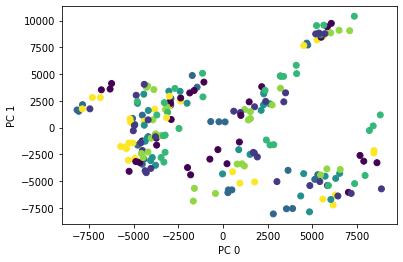

In [51]:
import matplotlib.pyplot as plt

#plt.axis('off')
plt.xlabel('PC 0')
plt.ylabel('PC 1')
plt.scatter(low_dim2[:,0],low_dim2[:,1],c=int_label)
plt.savefig('pca_2Dimension.pdf', bbox_inches='tight')

In [52]:
def plot(index):
  fig, (ax1, ax2, ax3) = plt.subplots(1, 3)

  original = dataset[index].reshape((256,256))
  pred = reconstructed[index].reshape((256,256))
  difference = np.sqrt(np.power(np.subtract(original, pred),2))

  vmax = max(np.max(original), np.max(pred))
  vmin = np.min(difference)

  ax1.axis('off')
  ax1.title.set_text('Original')
  ax1.imshow(original, cmap='gray', vmin=0, vmax=vmax)

  ax2.axis('off')
  ax2.title.set_text('Reconstructed')
  ax2.imshow(pred, cmap='gray', vmin=0, vmax= vmax)

  ax3.axis('off')
  ax3.title.set_text('Difference')
  ax3.imshow(difference,cmap='hot', vmin = vmin, vmax = vmax)

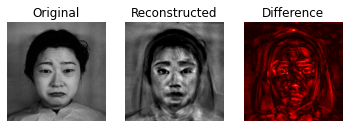

In [53]:
plot(40)

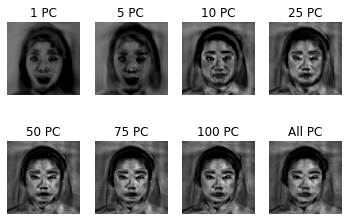

In [54]:
fig, axes = plt.subplots(2, 4)
index=25
pca1Rec = (low_dim_all[index,:1][np.newaxis]@pca99.components_[:1,:]).reshape((256,256))
pca5Rec = (low_dim_all[index,:6][np.newaxis]@pca99.components_[:6,:]).reshape((256,256))
pca10Rec = (low_dim_all[index,:11][np.newaxis]@pca99.components_[:11,:]).reshape((256,256))
pca25Rec = (low_dim_all[index,:26][np.newaxis]@pca99.components_[:26,:]).reshape((256,256))
pca50Rec = (low_dim_all[index,:51][np.newaxis]@pca99.components_[:51,:]).reshape((256,256))
pca75Rec = (low_dim_all[index,:76][np.newaxis]@pca99.components_[:76,:]).reshape((256,256))
pca100Rec = (low_dim_all[index,:101][np.newaxis]@pca99.components_[:101,:]).reshape((256,256))
pcaFull = (low_dim_all[index,:][np.newaxis]@pca99.components_[:,:]).reshape((256,256))

vmax = max(np.max(pca5Rec),np.max(pca1Rec),np.max(pca10Rec),np.max(pca25Rec),np.max(pca50Rec),np.max(pca100Rec),np.max(pca75Rec),np.max(pcaFull))


axes[0][0].axis('off')
axes[0][0].title.set_text('1 PC')
axes[0][0].imshow(pca1Rec, cmap='gray', vmin=0, vmax= vmax)

axes[0][1].axis('off')
axes[0][1].title.set_text('5 PC')
axes[0][1].imshow(pca5Rec, cmap='gray', vmin=0, vmax=vmax)

axes[0][2].axis('off')
axes[0][2].title.set_text('10 PC')
axes[0][2].imshow(pca10Rec, cmap='gray', vmin=0, vmax= vmax)

axes[0][3].axis('off')
axes[0][3].title.set_text('25 PC')
axes[0][3].imshow(pca25Rec, cmap='gray', vmin=0, vmax= vmax)

axes[1][0].axis('off')
axes[1][0].title.set_text('50 PC')
axes[1][0].imshow(pca50Rec, cmap='gray', vmin=0, vmax= vmax)

axes[1][1].axis('off')
axes[1][1].title.set_text('75 PC')
axes[1][1].imshow(pca75Rec, cmap='gray', vmin=0, vmax= vmax)

axes[1][2].axis('off')
axes[1][2].title.set_text('100 PC')
axes[1][2].imshow(pca100Rec, cmap='gray', vmin=0, vmax= vmax)

axes[1][3].axis('off')
axes[1][3].title.set_text('All PC')
axes[1][3].imshow(pcaFull, cmap='gray', vmin=0, vmax= vmax)

plt.savefig('face_reconstruction.pdf', bbox_inches='tight')

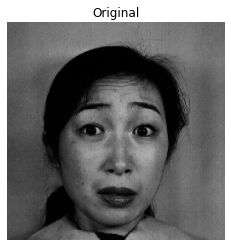

In [55]:
fig, (ax1) = plt.subplots(1, 1)
original = dataset[8].reshape((256,256))

ax1.axis('off')
ax1.title.set_text('Original')
ax1.imshow(original, cmap='gray', vmin=0, vmax=vmax)

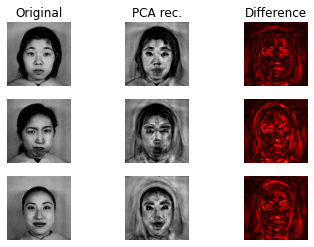

In [56]:
fig, axes = plt.subplots(3, 3)
totalPlots = axes.shape[0]*axes.shape[1]

for y in range(axes.shape[0]):
    index = np.random.randint(0,100)
    if y==0:
      axes[y][0].title.set_text('Original')
      axes[y][1].title.set_text('PCA rec.')
      axes[y][2].title.set_text('Difference')

    vmax = max(np.max(dataset[index]), np.max(reconstructed[index]))
  
    axes[y][0].axis('off')
    axes[y][0].imshow(dataset[index].reshape((256,256)), cmap='gray', vmin=0, vmax=vmax)

    axes[y][1].axis('off')
    axes[y][1].imshow(reconstructed[index].reshape((256,256)), cmap='gray', vmin=0, vmax=vmax)

    axes[y][2].axis('off')
    differenceInReconstruction = np.sqrt(np.power(dataset[index].reshape((256,256))-reconstructed[index].reshape((256,256)),2))
    vmin = np.min(differenceInReconstruction)
    axes[y][2].imshow(differenceInReconstruction, cmap='hot', vmin=vmin, vmax=vmax)

In [57]:
from sklearn.svm import SVC
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score

In [58]:
labels = np.array(int_label)

In [59]:
import time

accuracy = []
time_ = []
for i in range(213):
  kf = KFold(n_splits=213, shuffle=True)
  pca = PCA(n_components=i+1)
  local_dataset = pca.fit_transform(dataset)
  clf = SVC()
  predictions = np.zeros(213)
  print(f'PCs up to {i}')
  count=0
  time_start = time.time()
  for train_index, test_index in kf.split(local_dataset):
    #print(f'Image {count}')
    count+=1
    X_train, X_test = local_dataset[train_index], local_dataset[test_index]
    y_train, y_test = labels[train_index], labels[test_index]
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    predictions[test_index] = y_pred

  time_elapsed = (time.time() - time_start)
  print(f'Time elapsed: {time_elapsed}\n')
  accuracy.append(accuracy_score(labels, predictions))
  time_.append(time_elapsed)

PCs up to 0
Time elapsed: 0.8469996452331543

PCs up to 1
Time elapsed: 0.9449942111968994

PCs up to 2
Time elapsed: 0.8470005989074707

PCs up to 3
Time elapsed: 1.0040004253387451

PCs up to 4
Time elapsed: 0.949002742767334

PCs up to 5
Time elapsed: 0.9299991130828857

PCs up to 6
Time elapsed: 0.97300124168396

PCs up to 7
Time elapsed: 0.9979994297027588

PCs up to 8
Time elapsed: 1.0779991149902344

PCs up to 9
Time elapsed: 1.2780044078826904

PCs up to 10
Time elapsed: 1.1129968166351318

PCs up to 11
Time elapsed: 1.0700008869171143

PCs up to 12
Time elapsed: 1.2080016136169434

PCs up to 13
Time elapsed: 1.107001781463623

PCs up to 14
Time elapsed: 1.0849990844726562

PCs up to 15
Time elapsed: 1.1400010585784912

PCs up to 16
Time elapsed: 1.1250033378601074

PCs up to 17
Time elapsed: 1.2060003280639648

PCs up to 18
Time elapsed: 1.1979999542236328

PCs up to 19
Time elapsed: 1.1729960441589355

PCs up to 20
Time elapsed: 1.218003273010254

PCs up to 21
Time elapsed: 1

KeyboardInterrupt: 

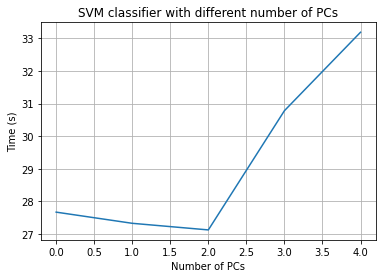

In [68]:
plt.plot(time_)
plt.grid()
plt.xlabel('Number of PCs')
plt.ylabel('Time (s)')
plt.title('SVM classifier with different number of PCs')
plt.savefig('svm_classifications_time.pdf', bbox_inches='tight')
plt.show()

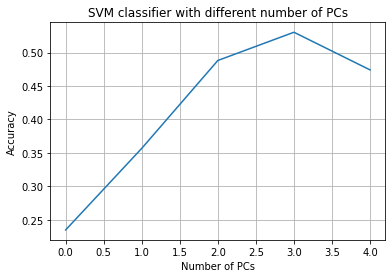

In [69]:
plt.plot(accuracy)
plt.grid()
plt.xlabel('Number of PCs')
plt.ylabel('Accuracy')
plt.title('SVM classifier with different number of PCs')
plt.savefig('svm_classifications_accuracy.pdf', bbox_inches='tight')
plt.show()

In [70]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import recall_score

In [72]:
import time

accuracy = []
time_ = []
for i in range(213):
  #rfc = RandomForestClassifier()
  kf = KFold(n_splits=213, shuffle=True)
  pca = PCA(n_components=i+1)
  local_dataset = pca.fit_transform(dataset)
  clf = RandomForestClassifier()
  predictions = np.zeros(213)
  print(f'PCs up to {i}')
  count=0
  time_start = time.time()
  for train_index, test_index in kf.split(local_dataset):
    #print(f'Image {count}')
    count+=1
    X_train, X_test = local_dataset[train_index], local_dataset[test_index]
    y_train, y_test = labels[train_index], labels[test_index]
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    predictions[test_index] = y_pred

  time_elapsed = (time.time() - time_start)
  print(f'Time elapsed: {time_elapsed}\n')
  accuracy.append(accuracy_score(labels, predictions))
  time_.append(time_elapsed)

PCs up to 0
Time elapsed: 31.497000217437744

PCs up to 1
Time elapsed: 31.499001026153564

PCs up to 2


KeyboardInterrupt: 

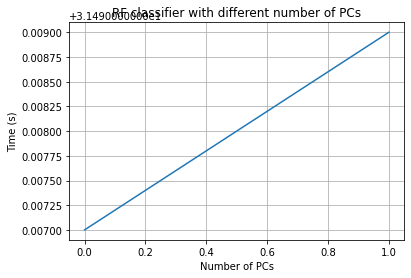

In [73]:
plt.plot(time_)
plt.grid()
plt.xlabel('Number of PCs')
plt.ylabel('Time (s)')
plt.title('RF classifier with different number of PCs')
plt.savefig('RF_time.pdf', bbox_inches='tight')
plt.show()

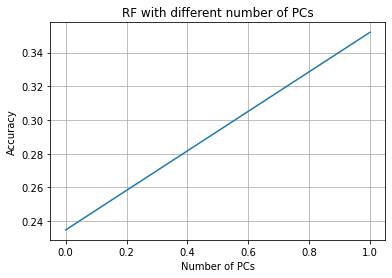

In [74]:
plt.plot(accuracy)
plt.grid()
plt.xlabel('Number of PCs')
plt.ylabel('Accuracy')
plt.title('RF with different number of PCs')
plt.savefig('RF_accuracy.pdf', bbox_inches='tight')
plt.show()

In [75]:
from sklearn.neighbors import KNeighborsClassifier
import time

accuracy = []
time_ = []
for i in range(213):
  #rfc = RandomForestClassifier()
  kf = KFold(n_splits=213, shuffle=True)
  pca = PCA(n_components=i+1)
  local_dataset = pca.fit_transform(dataset)
  clf = KNeighborsClassifier()
  predictions = np.zeros(213)
  print(f'PCs up to {i}')
  count=0
  time_start = time.time()
  for train_index, test_index in kf.split(local_dataset):
    #print(f'Image {count}')
    count+=1
    X_train, X_test = local_dataset[train_index], local_dataset[test_index]
    y_train, y_test = labels[train_index], labels[test_index]
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    predictions[test_index] = y_pred

  time_elapsed = (time.time() - time_start)
  print(f'Time elapsed: {time_elapsed}\n')
  accuracy.append(accuracy_score(labels, predictions))
  time_.append(time_elapsed)

PCs up to 0
Time elapsed: 0.24900031089782715

PCs up to 1
Time elapsed: 0.2559998035430908

PCs up to 2
Time elapsed: 0.2310030460357666

PCs up to 3
Time elapsed: 0.25800013542175293



KeyboardInterrupt: 

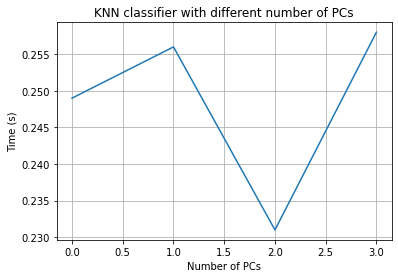

In [76]:
plt.plot(time_)
plt.grid()
plt.xlabel('Number of PCs')
plt.ylabel('Time (s)')
plt.title('KNN classifier with different number of PCs')
plt.savefig('KNN_time.pdf', bbox_inches='tight')
plt.show()

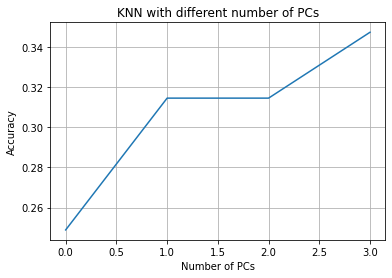

In [77]:
plt.plot(accuracy)
plt.grid()
plt.xlabel('Number of PCs')
plt.ylabel('Accuracy')
plt.title('KNN with different number of PCs')
plt.savefig('KNN_accuracy.pdf', bbox_inches='tight')
plt.show()

In [78]:
from sklearn.decomposition import KernelPCA
transformer = KernelPCA(n_components=190, kernel='cosine', fit_inverse_transform=True)
X_transformed = transformer.fit_transform(dataset)
reconstructed_kernel = transformer.inverse_transform(X_transformed)

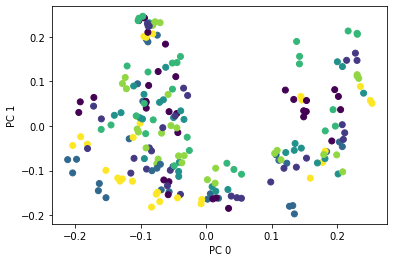

In [79]:
import matplotlib.pyplot as plt
from sklearn.decomposition import KernelPCA

pca2_kernel = KernelPCA(n_components=2, kernel='cosine')
low_dim2_kernel = pca2_kernel.fit_transform(dataset)
#plt.axis('off')
plt.xlabel('PC 0')
plt.ylabel('PC 1')
plt.scatter(low_dim2_kernel[:,0],low_dim2_kernel[:,1],c=labels)
plt.savefig('pca_2Dimension_kernel.pdf', bbox_inches='tight')

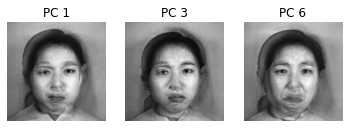

In [81]:
import matplotlib.pyplot as plt

fig, (ax1, ax2, ax3) = plt.subplots(1, 3)

ax1.axis('off')
ax1.imshow(transformer.dual_coef_[1].reshape(256,256),cmap='gray')
ax1.title.set_text('PC 1')

ax2.axis('off')
ax2.imshow(transformer.dual_coef_[2].reshape(256,256),cmap='gray')
ax2.title.set_text('PC 3')

ax3.axis('off')
ax3.imshow(transformer.dual_coef_[5].reshape(256,256),cmap='gray')
ax3.title.set_text('PC 6')

plt.savefig('eigenFaces.pdf', bbox_inches='tight')
plt.show()

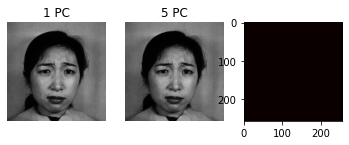

In [82]:
fig, (ax1,ax2,ax3) = plt.subplots(1, 3)
index=3

transformer = KernelPCA(n_components=100, kernel='poly', fit_inverse_transform=True)
X_transformed = transformer.fit_transform(dataset)
reconstructed_kernel = transformer.inverse_transform(X_transformed)
pca1Rec = (reconstructed_kernel[index]).reshape((256,256))


transformer = KernelPCA(n_components=50, kernel='poly', fit_inverse_transform=True)
X_transformed = transformer.fit_transform(dataset)
reconstructed_kernel = transformer.inverse_transform(X_transformed)
pca5Rec = (reconstructed_kernel[index]).reshape((256,256))

ax1.axis('off')
ax1.title.set_text('1 PC')
ax1.imshow(pca1Rec, cmap='gray', vmin=0, vmax= vmax)

ax2.axis('off')
ax2.title.set_text('5 PC')
ax2.imshow(pca5Rec, cmap='gray', vmin=0, vmax= vmax)

differenceInReconstruction = np.sqrt(np.power(pca1Rec-pca5Rec,2))
vmin = np.min(differenceInReconstruction)
ax3.imshow(differenceInReconstruction, cmap='hot', vmin=vmin, vmax=vmax)

### FACE REGOGNITION


In [83]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA as RandomizedPCA
from sklearn.metrics import confusion_matrix

from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_lfw_people
from sklearn.metrics import classification_report
from sklearn.decomposition import PCA
from sklearn.neural_network import MLPClassifier

from sklearn.model_selection import GridSearchCV

from sklearn.svm import SVC

X = dataset
y = labels
target_names = np.unique(labels)
target_names=list(map(str,target_names))


# split into a training and testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [84]:
# Compute a PCA 
n_components = 100
pca = PCA(n_components=n_components, whiten=True).fit(X_train)
 
# apply PCA transformation
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

In [85]:
print("Fitting the classifier to the training set")
param_grid = {
            # 'C': [1e3, 5e3, 1e4, 5e4, 1e5],
          #'gamma': [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.1],  
        'C': [  100000000000e4],
        'gamma': [ 0.000000001]
          }
clf = GridSearchCV(SVC(kernel='rbf', class_weight='balanced'), param_grid)
clf = clf.fit(X_train_pca, y_train)
print("Best estimator found by grid search:")
print(clf.best_estimator_)

Fitting the classifier to the training set
Best estimator found by grid search:
SVC(C=1000000000000000.0, class_weight='balanced', gamma=1e-09)


In [86]:
y_pred = clf.predict(X_test_pca)
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

           0       0.19      1.00      0.32         9
           1       1.00      0.18      0.31        11
           2       1.00      0.12      0.22         8
           3       1.00      0.36      0.53        11
           4       0.00      0.00      0.00         9
           5       0.33      0.33      0.33         3
           6       1.00      0.46      0.63        13

    accuracy                           0.36        64
   macro avg       0.65      0.35      0.33        64
weighted avg       0.71      0.36      0.36        64



In [87]:
print("Confusion Matrix is:")
print(confusion_matrix(y_test, y_pred, labels = range(10)))

Confusion Matrix is:
[[9 0 0 0 0 0 0 0 0 0]
 [8 2 0 0 0 1 0 0 0 0]
 [7 0 1 0 0 0 0 0 0 0]
 [6 0 0 4 0 1 0 0 0 0]
 [9 0 0 0 0 0 0 0 0 0]
 [2 0 0 0 0 1 0 0 0 0]
 [7 0 0 0 0 0 6 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]]


In [88]:
target_names

['0', '1', '2', '3', '4', '5', '6']

In [138]:
def title(y_pred, y_test, target_names, i):
    pred_name = target_names[y_pred[i]].rsplit(' ', 1)[-1]
    true_name = target_names[y_test[i]].rsplit(' ', 1)[-1]
    return 'predicted: %s\ntrue:      %s' % (int_to_label_dict[int(pred_name)], int_to_label_dict[int(true_name)])
def plot_gallery(images, titles, h, w, n_row=3, n_col=4):
    """Helper function to plot a gallery of portraits"""
    plt.figure(figsize=(1.8 * n_col, 2.4 * n_row))
    plt.subplots_adjust(bottom=0, left=.01, right=.99, top=.90, hspace=.35)
    for i in range(n_row * n_col):
        plt.subplot(n_row, n_col, i + 1)
        plt.imshow(images[i].reshape((h, w)), cmap=plt.cm.gray)
        plt.title(titles[i], size=12)
        plt.xticks(())
        plt.yticks(())
        plt.savefig('Face_recognition.png', bbox_inches='tight')

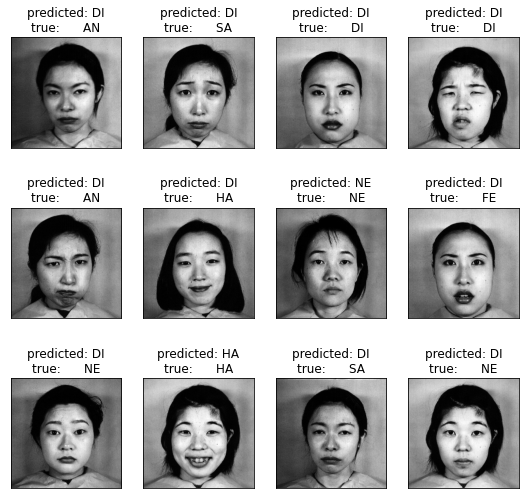

In [139]:
prediction_titles = [title(y_pred, y_test, target_names, i)
                         for i in range(y_pred.shape[0])]
plot_gallery(X_test, prediction_titles, 256, 256)

In [ ]:

accuracy = []
time_ = []
for i in range(213):
  #rfc = RandomForestClassifier()
  kf = KFold(n_splits=213, shuffle=True)
  pca = PCA(n_components=i+1)
  local_dataset = pca.fit_transform(dataset)
  clf = RandomForestClassifier()
  predictions = np.zeros(213)
  print(f'PCs up to {i}')
  count=0
  time_start = time.time()
  for train_index, test_index in kf.split(local_dataset):
    #print(f'Image {count}')
    count+=1
    X_train, X_test = local_dataset[train_index], local_dataset[test_index]
    y_train, y_test = labels[train_index], labels[test_index]
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    predictions[test_index] = y_pred

  time_elapsed = (time.time() - time_start)
  print(f'Time elapsed: {time_elapsed}\n')
  accuracy.append(accuracy_score(labels, predictions))
  time_.append(time_elapsed)

In [142]:
### LDA after PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

accuracy_lda_pca = []
time_lda_pca = []
for i in range(213):
  kf = KFold(n_splits=213, shuffle=True)
  pca = PCA(n_components=i+1)
  local_dataset = pca.fit_transform(dataset)
  clf = LinearDiscriminantAnalysis()
  predictions = np.zeros(213)
  print(f'PCs up to {i}')
  count=0
  time_start = time.time()
  for train_index, test_index in kf.split(local_dataset):
    count+=1
    X_train, X_test = local_dataset[train_index], local_dataset[test_index]
    y_train, y_test = labels[train_index], labels[test_index]
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    predictions[test_index] = y_pred

  time_elapsed = (time.time() - time_start)
  print(f'Time elapsed: {time_elapsed}\n')
  acc = accuracy_score(labels, predictions)
  print(f'Accuracy: {acc}')
  accuracy_lda_pca.append(acc)
  time_lda_pca.append(time_elapsed)

PCs up to 0
Time elapsed: 0.17598485946655273

Accuracy: 0.11737089201877934
PCs up to 1
Time elapsed: 0.1929781436920166

Accuracy: 0.107981220657277
PCs up to 2
Time elapsed: 0.20000100135803223

Accuracy: 0.2112676056338028
PCs up to 3
Time elapsed: 0.2140045166015625

Accuracy: 0.2112676056338028
PCs up to 4
Time elapsed: 0.21600103378295898

Accuracy: 0.2300469483568075
PCs up to 5
Time elapsed: 0.231003999710083

Accuracy: 0.16901408450704225
PCs up to 6
Time elapsed: 0.23200345039367676

Accuracy: 0.18779342723004694
PCs up to 7
Time elapsed: 0.2850165367126465

Accuracy: 0.17370892018779344
PCs up to 8
Time elapsed: 0.25301504135131836

Accuracy: 0.1784037558685446
PCs up to 9
Time elapsed: 0.26398181915283203

Accuracy: 0.20187793427230047
PCs up to 10
Time elapsed: 0.28000831604003906

Accuracy: 0.2112676056338028
PCs up to 11
Time elapsed: 0.29900240898132324

Accuracy: 0.24413145539906103
PCs up to 12
Time elapsed: 0.2850048542022705

Accuracy: 0.30985915492957744
PCs up to

In [109]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.model_selection import train_test_split
#kf = KFold(n_splits=3, shuffle=True)
X_train, X_test, y_train, y_test = train_test_split(dataset_norm, label, test_size=0.2, random_state=2045)

clf = LinearDiscriminantAnalysis()
#clf = QuadraticDiscriminantAnalysis()
local_dataset = dataset_norm
predictions = np.zeros(213)
count=0

time_start = time.time()
# for train_index, test_index in kf.split(local_dataset):
#     count+=1
#     X_train, X_test = local_dataset[train_index], local_dataset[test_index]
#     y_train, y_test = labels[train_index], labels[test_index]
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
#     predictions[test_index] = y_pred

time_elapsed = (time.time() - time_start)
print('QDA without PCA')
print(f'Time elapsed: {time_elapsed}\n')
acc = accuracy_score(y_test, y_pred)
print(f'Accuracy: {acc}')

QDA without PCA
Time elapsed: 5.323005676269531

Accuracy: 0.8604651162790697


In [107]:
kf = KFold(n_splits=3, shuffle=True)
clf = LinearDiscriminantAnalysis()
local_dataset = dataset_norm
predictions = np.zeros(213)
count=0
time_start = time.time()
for train_index, test_index in kf.split(local_dataset):
    count+=1
    X_train, X_test = local_dataset[train_index], local_dataset[test_index]
    y_train, y_test = labels[train_index], labels[test_index]
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    predictions[test_index] = y_pred

time_elapsed = (time.time() - time_start)
print('QDA without PCA')
print(f'Time elapsed: {time_elapsed}\n')
acc = accuracy_score(labels, predictions)
print(f'Accuracy: {acc}')

QDA without PCA
Time elapsed: 13.427000284194946

Accuracy: 0.6384976525821596


In [2]:
plt.plot(time_lda_pca)
plt.grid()
plt.xlabel('Number of PCs')
plt.ylabel('Time (s)')
plt.title('LDA_PCA classifier with different number of PCs')
plt.savefig('lda_pca_time.pdf', bbox_inches='tight')

NameError: name 'plt' is not defined

In [ ]:
plt.plot(accuracy_lda_pca)
plt.grid()
plt.xlabel('Number of PCs')
plt.ylabel('Accuracy')
plt.title('LDA_PCA with different number of PCs')
plt.savefig('lda_pca_accuracy.pdf', bbox_inches='tight')

In [ ]:
import keras
from keras import layers

input_img = keras.Input(shape=(28, 28, 1))

x = layers.Conv2D(16, (3, 3), activation='relu', padding='same')(input_img)
x = layers.MaxPooling2D((2, 2), padding='same')(x)
x = layers.Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = layers.MaxPooling2D((2, 2), padding='same')(x)
x = layers.Conv2D(8, (3, 3), activation='relu', padding='same')(x)
encoded = layers.MaxPooling2D((2, 2), padding='same')(x)

# at this point the representation is (4, 4, 8) i.e. 128-dimensional

x = layers.Conv2D(8, (3, 3), activation='relu', padding='same')(encoded)
x = layers.UpSampling2D((2, 2))(x)
x = layers.Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = layers.UpSampling2D((2, 2))(x)
x = layers.Conv2D(16, (3, 3), activation='relu')(x)
x = layers.UpSampling2D((2, 2))(x)
decoded = layers.Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

autoencoder = keras.Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')